In [1]:
# 1. Import the required libraries.

import pandas as pd
import numpy as np
import matplotlib

In [23]:
# 2. Set a variable for columns.

column_headers = [
    "Age",
    "Sex",
    "ChestPainType",
    "BloodPressure",
    "SerumCholestrol",
    "FastingBloodSugarOver120",
    "ECGAtRest",
    "MaxHeartRate",
    "HasExerciseInducedAngina",
    "STDepression",
    "STSlope",
    "FlouroscopyMajorVessels",
    "Thal",
    "Diagnosis"
]

pd.set_option("display.max_columns", 200)

In [6]:
# 3. Load the first data-set (Cleveland)

df_cleveland_raw = pd.read_csv('../data-sets/processed.cleveland.data', names=column_headers)

df_cleveland_raw.shape

(303, 14)

In [7]:
# 4. Shape of 303 rows with 14 columns. Let's do a head and look at the data.

df_cleveland_raw.head(5)

,Age,Sex,ChestPainType,BloodPressure,SerumCholestrol,FastingBloodSugarOver120,ECGAtRest,MaxHeartRate,HasExerciseInducedAngina,STDepression,STSlope,FlouroscopyMajorVessels,Thal,Diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [27]:
# 5. Could use some cleanup of data-types.

df_cleveland_raw.astype({
    'Age':'int',
    'Sex':'int',
    'ChestPainType':'int',
    'BloodPressure':'float',
    'SerumCholestrol':'float',
    'FastingBloodSugarOver120':'bool',
    'ECGAtRest':'int',
    'MaxHeartRate':'float',
    'HasExerciseInducedAngina':'bool',
    'STDepression':'float',
    'STSlope':'int',
    'FlouroscopyMajorVessels':'float'
})

ValueError: could not convert string to float: '?'

In [30]:
# 6. Went one-by-one setting dtypes, but errored out at 'FluroscopyMajorVessels' to int.
#    Might need to do float before int, but got
#    
#       "ValueError: could not convert string to float: '?'"
#
#    Meaning there's somewhere with missing info denoted by '?'
# 
#    Let's locate and remove them

df_cleveland_raw.loc[df_cleveland_raw['FlouroscopyMajorVessels'] == '?']

,Age,Sex,ChestPainType,BloodPressure,SerumCholestrol,FastingBloodSugarOver120,ECGAtRest,MaxHeartRate,HasExerciseInducedAngina,STDepression,STSlope,FlouroscopyMajorVessels,Thal,Diagnosis
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [31]:
# 7. Looks like, values 166, 192, 287 and 302 are missing. Removing them from the data-frame.

df_cleveland_no_missing_level_1 = df_cleveland_raw.drop(axis=1, index=[166,192,287,302])

In [36]:
# 8. Let's try the astype again.

df_cleveland_no_missing_level_1 = df_cleveland_no_missing_level_1.astype({
    'Age':'int',
    'Sex':'int',
    'ChestPainType':'int',
    'BloodPressure':'float',
    'SerumCholestrol':'float',
    'FastingBloodSugarOver120':'bool',
    'ECGAtRest':'int',
    'MaxHeartRate':'float',
    'HasExerciseInducedAngina':'bool',
    'STDepression':'float',
    'STSlope':'int',
    'FlouroscopyMajorVessels':'float'
})

#   Nicely done.

df_cleveland_no_missing_level_1 = df_cleveland_no_missing_level_1.astype({
    'Age':'int',
    'Sex':'int',
    'ChestPainType':'int',
    'BloodPressure':'float',
    'SerumCholestrol':'float',
    'FastingBloodSugarOver120':'bool',
    'ECGAtRest':'int',
    'MaxHeartRate':'float',
    'HasExerciseInducedAngina':'bool',
    'STDepression':'float',
    'STSlope':'int',
    'FlouroscopyMajorVessels':'int'
})

In [38]:
# 10. Next column.

df_cleveland_no_missing_level_1.astype({
    'Age':'int',
    'Sex':'int',
    'ChestPainType':'int',
    'BloodPressure':'float',
    'SerumCholestrol':'float',
    'FastingBloodSugarOver120':'bool',
    'ECGAtRest':'int',
    'MaxHeartRate':'float',
    'HasExerciseInducedAngina':'bool',
    'STDepression':'float',
    'STSlope':'int',
    'FlouroscopyMajorVessels':'int',
    'Thal':'float'
})

ValueError: could not convert string to float: '?'

In [39]:
# 11. Welp, looks like 'Thal' has the same issue, let's look for missings.

df_cleveland_no_missing_level_1.loc[df_cleveland_no_missing_level_1['Thal'] == '?']

,Age,Sex,ChestPainType,BloodPressure,SerumCholestrol,FastingBloodSugarOver120,ECGAtRest,MaxHeartRate,HasExerciseInducedAngina,STDepression,STSlope,FlouroscopyMajorVessels,Thal,Diagnosis
87,53,0,3,128.0,216.0,False,2,115.0,False,0.0,1,0,?,0
266,52,1,4,128.0,204.0,True,0,156.0,True,1.0,2,0,?,2


In [40]:
# 12. Indexes 87 and 266 are missing. Removing.

df_cleveland_no_missing_level_2 = df_cleveland_no_missing_level_1.drop(axis=1, index=[87,266])

In [44]:
# 13. Now trying astype for 'Thal'

df_cleveland_no_missing_level_2 = df_cleveland_no_missing_level_2.astype({
    'Age':'int',
    'Sex':'int',
    'ChestPainType':'int',
    'BloodPressure':'float',
    'SerumCholestrol':'float',
    'FastingBloodSugarOver120':'bool',
    'ECGAtRest':'int',
    'MaxHeartRate':'float',
    'HasExerciseInducedAngina':'bool',
    'STDepression':'float',
    'STSlope':'int',
    'FlouroscopyMajorVessels':'int',
    'Thal':'float'
})

# Works.

df_cleveland_no_missing_level_2 = df_cleveland_no_missing_level_2.astype({
    'Age':'int',
    'Sex':'int',
    'ChestPainType':'int',
    'BloodPressure':'float',
    'SerumCholestrol':'float',
    'FastingBloodSugarOver120':'bool',
    'ECGAtRest':'int',
    'MaxHeartRate':'float',
    'HasExerciseInducedAngina':'bool',
    'STDepression':'float',
    'STSlope':'int',
    'FlouroscopyMajorVessels':'int',
    'Thal':'int'
})

In [48]:
# 14. Last column is 'Diagnosis'

df_cleveland_no_missing_level_2 = df_cleveland_no_missing_level_2.astype({
    'Age':'int',
    'Sex':'int',
    'ChestPainType':'int',
    'BloodPressure':'float',
    'SerumCholestrol':'float',
    'FastingBloodSugarOver120':'bool',
    'ECGAtRest':'int',
    'MaxHeartRate':'float',
    'HasExerciseInducedAngina':'bool',
    'STDepression':'float',
    'STSlope':'int',
    'FlouroscopyMajorVessels':'int',
    'Thal':'float',
    'Diagnosis':'bool'
})

df_cleveland_no_missing_level_2

,Age,Sex,ChestPainType,BloodPressure,SerumCholestrol,FastingBloodSugarOver120,ECGAtRest,MaxHeartRate,HasExerciseInducedAngina,STDepression,STSlope,FlouroscopyMajorVessels,Thal,Diagnosis
0,63,1,1,145.0,233.0,True,2,150.0,False,2.3,3,0,6.0,False
1,67,1,4,160.0,286.0,False,2,108.0,True,1.5,2,3,3.0,True
2,67,1,4,120.0,229.0,False,2,129.0,True,2.6,2,2,7.0,True
3,37,1,3,130.0,250.0,False,0,187.0,False,3.5,3,0,3.0,False
4,41,0,2,130.0,204.0,False,2,172.0,False,1.4,1,0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140.0,241.0,False,0,123.0,True,0.2,2,0,7.0,True
298,45,1,1,110.0,264.0,False,0,132.0,False,1.2,2,0,7.0,True
299,68,1,4,144.0,193.0,True,0,141.0,False,3.4,2,2,7.0,True
300,57,1,4,130.0,131.0,False,0,115.0,True,1.2,2,1,7.0,True


In [60]:
# 15.
df_cleveland_test = df_cleveland_no_missing_level_2.astype({'Diagnosis':'int'})

Diagnosis
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: STDepression, dtype: object

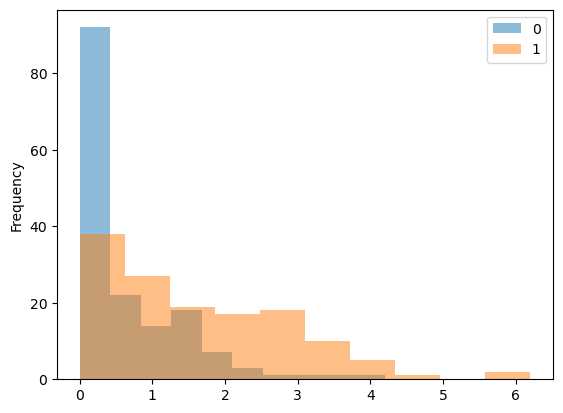

In [89]:
df_cleveland_test.groupby('Diagnosis')['STDepression'].plot(kind="hist", legend=True, alpha=0.5, by="")